<a href="https://colab.research.google.com/github/sinchanakp6/handwritten_digit_recognition_py/blob/main/handwritten_digit_recog_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install keras 


In [ ]:
!pip install --upgrade pip
!pip install opencv-python 

#pip3 install opencv-python


     |████████████████████████████████| 1.7 MB 5.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
import cv2

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist


In [ ]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

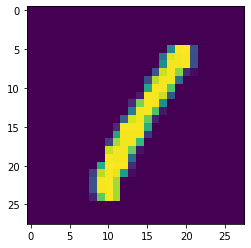

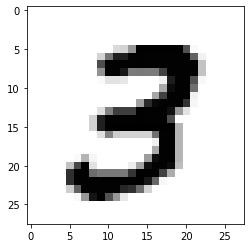

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
plt.show()
plt.imshow(x_train[7] , cmap = plt.cm.binary)

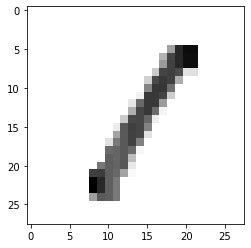

In [ ]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[3] , cmap = plt.cm.binary)


In [ ]:
print(x_train[0])
print(y_train[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [ ]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 3 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/3
329/329 [==============================] - 122s 367ms/step - loss: 0.2886 - accuracy: 0.9135 - val_loss: 0.0840 - val_accuracy: 0.9749
Epoch 2/3
124/329 [==========>...................] - ETA: 1:09 - loss: 0.0951 - accuracy: 0.9701

In [ ]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 [==============================] - 9s 30ms/step - loss: 0.0388 - accuracy: 0.9884
Test loss on 10,000 test samples 0.03878088667988777
Validation Accuracy on 10,000 samples 0.9883999824523926


6


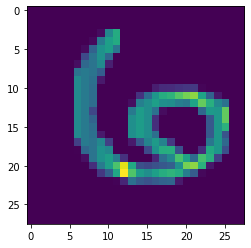

In [ ]:
predictions = model.predict([x_tester])

print(np.argmax(predictions[54]))

plt.imshow(x_test[54])

In [ ]:
model.save("digit_recogniser_model.h5")